In [1]:
# The ProteinUnfolding2D module depends on modules xlrd and lmfit
import ProteinUnfolding2D
import numpy as np

# Read any number of NanoDSF Excel files into a parser, see help(ProteinUnfolding2D)
nanodsf_data = ProteinUnfolding2D.NanoDsfParser("2D_Unfolding_191121_dF106_L11P_edF106_P92S_I88T.xlsx",
                                                "2D_Unfolding_191115_E54Y_F53V_P92T_M51K.xlsx",
                                                "2D_Unfolding_191108_T57I_L87F_K79H_WT.xlsx",
                                                "2D_Unfolding_191125_V83L_M51R_L55V_E54V.xlsx",
                                                "2D_Unfolding_191108_I88S_Top5.xlsx",
                                                "2D_Unfolding_191125_Top10_Top15_Top20_TopPos.xlsx",
                                                "2D_Unfolding_191204_I88S-redone.xlsx",
                                                "2D_Unfolding_191128_M51T_WT-redone_Top15-redone.xlsx",
                                                "2D_Unfolding_210624_P92R.xlsx",
                                                "2D_Unfolding_200703_MM8_MM8-V54Y_MM8-S92P.xlsx",
                                                "2D_Unfolding_200518_Top15-nr2.xlsx",
                                                "2D_Unfolding_211112_MM9_serie_1_2.xlsx",
                                                "2D_Unfolding_211115_MM8_serie_1_2.xlsx",
                                                "2D_Unfolding_211117_MM9_MM8_serie_3.xlsx")

n_samples = nanodsf_data.info()

File  0 with 36 samples, 4 curves (['I330', 'I350', 'I330_REFOLD', 'I350_REFOLD']) and 1743 temperature points : '2D_Unfolding_191121_dF106_L11P_edF106_P92S_I88T.xlsx'
File  1 with 48 samples, 4 curves (['I330', 'I350', 'I330_REFOLD', 'I350_REFOLD']) and 1395 temperature points : '2D_Unfolding_191115_E54Y_F53V_P92T_M51K.xlsx'
File  2 with 48 samples, 4 curves (['I330', 'I350', 'I330_REFOLD', 'I350_REFOLD']) and 1395 temperature points : '2D_Unfolding_191108_T57I_L87F_K79H_WT.xlsx'
File  3 with 48 samples, 4 curves (['I330', 'I350', 'I330_REFOLD', 'I350_REFOLD']) and 1396 temperature points : '2D_Unfolding_191125_V83L_M51R_L55V_E54V.xlsx'
File  4 with 24 samples, 4 curves (['I330', 'I350', 'I330_REFOLD', 'I350_REFOLD']) and 2323 temperature points : '2D_Unfolding_191108_I88S_Top5.xlsx'
File  5 with 48 samples, 4 curves (['I330', 'I350', 'I330_REFOLD', 'I350_REFOLD']) and 1396 temperature points : '2D_Unfolding_191125_Top10_Top15_Top20_TopPos.xlsx'
File  6 with 12 samples, 4 curves (['I3

In [2]:
###############################
### DATA FOR ALL VARIANTS - Without first capillary (0M GuHCl) - L55V one outlier deleted - MM6/9 first 4 deleted
###############################

### Sample aliases
# edF106 = WT
# MM3 = Top5
# MM6 = Top10
# MM9 = Top15
# eMM9 = MM8


data_sets = {}
# File "2D_Unfolding_191121_dF106_L11P_edF106_P92S_I88T.xlsx"
data_sets['P92S']   = nanodsf_data.get(range(13,24), temp_min=20.1, temp_max=85,         curve_labels=['I330','I350']) 
data_sets['I88T']   = nanodsf_data.get(range(25,36), temp_min=20.1, temp_max=85,         curve_labels=['I330','I350'])
# File "2D_Unfolding_191115_E54Y_F53V_P92T_M51K.xlsx"
data_sets['E54Y']   = nanodsf_data.get(range(36+1 ,36+12),   temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['P92T']   = nanodsf_data.get(range(36+25, 36+36),  temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['M51K']   = nanodsf_data.get(range(36+37, 36+48),  temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_191108_T57I_L87F_K79H_WT.xlsx"
data_sets['T57I']   = nanodsf_data.get(range(84+1,  84+12),  temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['L87F']   = nanodsf_data.get(range(84+13, 84+24),  temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['K79H']   = nanodsf_data.get(range(84+25, 84+36),  temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['edF106'] = nanodsf_data.get(range(84+37, 84+48),  temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_191125_V83L_M51R_L55V_E54V.xlsx"
data_sets['V83L']   = nanodsf_data.get(range(132+1 ,132+12), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['M51R']   = nanodsf_data.get(range(132+13,132+24), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['L55V']   = nanodsf_data.get(range(132+25,132+36), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
del data_sets['L55V'][2]
data_sets['E54V']   = nanodsf_data.get(range(132+37,132+48), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_191108_I88S_Top5.xlsx"
data_sets['MM3']    = nanodsf_data.get(range(180+13,180+24), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_191125_Top10_Top15_Top20_TopPos.xlsx"
data_sets['MM6']    = nanodsf_data.get(range(204+4 ,204+12), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['MM9']    = nanodsf_data.get(range(204+16,204+24), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_191204_I88S-redone.xlsx"
data_sets['I88S']   = nanodsf_data.get(range(252+1 ,252+12), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_191128_M51T_WT-redone_Top15-redone.xlsx"
data_sets['M51T']   = nanodsf_data.get(range(264+1 ,264+12), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_210624_P92R.xlsx"
data_sets['P92R']   = nanodsf_data.get(range(300+1 ,300+28), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_200703_MM8_MM8-V54Y_MM8-S92P.xlsx"
data_sets['eMM9_0'] = nanodsf_data.get(range(328+1 ,328+12), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_200518_Top15-nr2.xlsx"
data_sets['MM9_0']  = nanodsf_data.get(range(364+1 ,364+21), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_211112_MM9_serie_1_2.xlsx"
data_sets['MM9_1']  = nanodsf_data.get(range(385+1 ,385+21), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['MM9_2']  = nanodsf_data.get(range(385+21+1 ,385+21+21), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_211115_MM8_serie_1_2.xlsx"
data_sets['eMM9_1'] = nanodsf_data.get(range(427+1 ,427+21), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['eMM9_2'] = nanodsf_data.get(range(427+21+1 ,427+21+21), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
# File "2D_Unfolding_211117_MM9_MM8_serie_3.xlsx"
data_sets['MM9_3']  = nanodsf_data.get(range(469+1 ,469+21), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])
data_sets['eMM9_3'] = nanodsf_data.get(range(469+21+1 ,469+21+21), temp_min=20.1, temp_max=85, curve_labels=['I330','I350'])


Number of samples (capilaries): 20
Curves: ['I350', 'I330']
Temperature range 20.10 - 84.97 deg C
Denaturent serie: [1.176, 2.156, 3.332, 3.528, 3.92, 4.116, 4.312, 4.704, 4.9, 5.292, 5.488, 5.88, 6.076, 6.272, 6.664, 6.86, 7.056, 7.252, 7.448, 7.84]


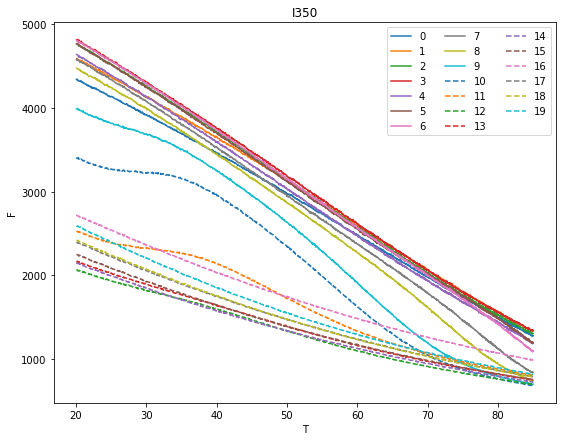

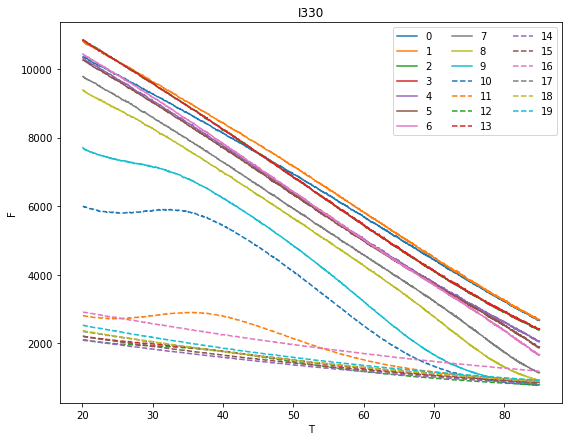

In [3]:

# Select a data set to plot
data2fit = data_sets['MM9_1']

# Dump info on selected data
print("Number of samples (capilaries): %d" % len(data2fit))
print("Curves: %s" % (str(data2fit.get_curve_labels())))
(temp_min, temp_max) = data2fit.get_temp_range()
print("Temperature range %.2f - %.2f deg C" % (temp_min,temp_max))
denat = [d['DENAT'] for d in data2fit]
print("Denaturent serie: %s" % (str(denat)))

# Look at selected data before fitting
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib.colors import TABLEAU_COLORS as tab_col

# Temperature plot
plt.rc('axes', prop_cycle=(cycler('color',  [*tab_col]*3)+
                           cycler('linestyle', ['-']*10+['--']*10+[':']*10)))
for label in data2fit.get_curve_labels():
    fig, ax = plt.subplots(figsize=(9, 7))
    for di in range(len(data2fit)):
        if label in data2fit[di].keys():
            ax.plot(data2fit[di]['T'], data2fit[di][label], label=str(di))
    legend = ax.legend(loc='upper right', ncol=len(data2fit)//10+1)
    plt.xlabel('T'); plt.ylabel('F'); plt.title(label); plt.show()

In [4]:
from ipywidgets import interact,IntSlider

# Data y-range
Imin = np.nan; Imax = np.nan
for label in data2fit.get_curve_labels():
    Imin = np.nanmin(np.concatenate([np.array([Imin])]+[(d[label] if label in d.keys() else []) for d in data2fit]))
    Imax = np.nanmax(np.concatenate([np.array([Imax])]+[(d[label] if label in d.keys() else []) for d in data2fit]))
I10pct = (Imax-Imin)/10.0
    
# Plot denaturant curve(s) at selected temperature
def f(T):
    fig, ax = plt.subplots(figsize=(7, 5))
    for label in data2fit.get_curve_labels():
        curve = [(d[label][np.argmin(np.abs(d['T']-T))] if label in d.keys() else np.NaN) for d in data2fit]
        ax.plot(denat, curve, 'o-', label=label)
    plt.ylim(Imin-I10pct,Imax+I10pct); plt.xlabel('Denaturant'); plt.ylabel('Intensity')
    legend = ax.legend(loc='upper left')
    plt.show()

# f(40)
i = interact(f, T=IntSlider(min=temp_min, max=temp_max, step=1, value=temp_min, continuous_update=False))

interactive(children=(IntSlider(value=20, continuous_update=False, description='T', max=84, min=20), Output())…

In [5]:
# Constants
R = 8.314e-3   # Gas constant in kJ/K/mol
#R = 1.985e-3  # Gas constant in kcal/K/mol
K0 = -273.15   # Zero Kelvin in Celcius 

# Thermodynamic function of fit
def unfold2d_I330_I350(temp_target, temp, denat, label,
                       a_F_I330=1.0, b_F_D_I330=0.0, b_F_T_I330=0.0,
                       a_U_I330=1.0, b_U_D_I330=0.0, b_U_T_I330=0.0, b_U_T2_I330=0.0,
                       a_F_I350=1.0, b_F_D_I350=0.0, b_F_T_I350=0.0,
                       a_U_I350=1.0, b_U_D_I350=0.0, b_U_T_I350=0.0, b_U_T2_I350=0.0,
                       Tm=70.0, dH=300.0, dCp=2.0, m0=1.0, m1=0.0, m2=0.0):
    # NanoDsf temperatures are in Celsius, thermodynamics in Kelvin
    T_K = temp - K0
    if Tm < -100:
        print("WARNING: Very low melting temperature %.1f" % (Tm))
    Tm_K = Tm - K0
    ToTm = T_K/Tm_K
    dT = temp - temp_target
    dT2 = dT*dT
    # Free energy of unfolding, dH, dCp and m should be positive
    dG_H2O = dH*(1-ToTm) + dCp*(T_K-Tm_K-T_K*np.log(ToTm))
    mD = denat*(m0 + m1*dT + m2*dT2)
    dG_U = dG_H2O - mD
    # Conditions where the protein is very unstable is capped to avoid explosion of exp
    # I could make a log approximation to secure gradients in this region if optimization is stuck in this region
    if np.any(dG_U < -250):
        i = np.where(dG_U < -250)
        dG_U[i] = -250
        print("WARNING: Bounded %d dG values to -250" % (len(i)))
    exp_dG = np.exp( -dG_U/(R*T_K) )
    # 330nm curve_label with folded (F) and unfolded (U) base planes
    bp_F_I330 = (a_F_I330 + b_F_D_I330*denat + b_F_T_I330*dT)
    bp_U_I330 = (a_U_I330 + b_U_D_I330*denat + b_U_T_I330*dT + b_U_T2_I330*dT2)
    I330 = (bp_F_I330 + exp_dG*bp_U_I330) / (1+exp_dG)
    # 350nm curve_label with folded (N) and denatured (D) base planes
    bp_F_I350 = (a_F_I350 + b_F_D_I350*denat + b_F_T_I350*dT)
    bp_U_I350 = (a_U_I350 + b_U_D_I350*denat + b_U_T_I350*dT + b_U_T2_I350*dT2)
    I350 = (bp_F_I350 + exp_dG*bp_U_I350) / (1+exp_dG)
    # Return an array where numbers match the curve_label label
    ret = np.where(label=='I330', I330, 0.0) + np.where(label=='I350', I350, 0.0)
    return(ret)

# Calculate dG of unfolding for a given model and temperature
def calc_dG(param, temp, denat=0.0):
    p = param.valuesdict()
    T = temp - K0; Tm = p['Tm'] - K0
    dT = temp - temp_target
    dG = p['dH']*(1-T/Tm) + p['dCp']*(T-Tm-T*np.log(T/Tm)) - denat*(p['m0'] + p['m1']*dT + p['m2']*dT*dT)
    return(dG)

In [6]:
def dump(fit_result, name, note=""):
    p = fit_result.params.valuesdict()
    dG = calc_dG(fit_result.params, temp=temp_target)
    print("%-6s dG %5.2f  m %5.2f  Tm %5.1f  dH %5.1f  dCp %4.1f  ChiSq %8.2g  %s" % 
          (name,dG,p['m0'],p['Tm'],p['dH'],p['dCp'],fit_result.chisqr,note))

In [7]:
## The target temperature to calculate final dG and center m-value expansion
temp_target = 25

# Model wrapper for the function to fit, see help(Unfolding2D.Unfold2dModel)
unfold2d_model = ProteinUnfolding2D.Unfold2DModel(unfold2d_I330_I350, 
                                           independent_vars=['temp_target', 'temp', 'denat', 'label'])
# Initial parameters
param_init = unfold2d_model.make_params()
param_init['Tm'].set(110)
param_init['dH'].set(505)

# Guess dCp and m-value based on the number of residues in the protein
Nres = 104
unfold2d_model.guess_Cp_m(Nres, R=R, params=param_init)

# Trun off the higher order m-value terms
param_init['m0'].set(12.6, vary=True)
param_init['m1'].set(0.0, vary=False)
param_init['m2'].set(0.0, vary=False)

fits = {}
for key in data_sets.keys():
    # Guess base-plane parameters for all curves
    for label in data_sets[key].get_curve_labels():
        unfold2d_model.guess_baseplane(data_sets[key], temp_target, label, params=param_init)
        # Guess the curvature of the unfolded temperature baseline
        unfold2d_model.guess_unfolded_curved(data_sets[key][0], temp_target, label, params=param_init)
    
    param_init['Tm'].set(110)
    if "MM" in key:
        param_init['m0'].set(13, vary=True)
        param_init['Tm'].set(150)
        param_init['dH'].set(470)
        unfold2d_model.guess_Cp_m(90, R=R, params=param_init)
    elif "P92R" in key:
        param_init['Tm'].set(110)
        param_init['dH'].set(520)
    elif "M51T" in key:
        param_init['Tm'].set(90)
        param_init['dH'].set(400)
    
    if "MM6" in key:
         param_init['Tm'].set(130)
    
    if "eMM9_0" in key:
        param_init['dH'].set(600)
        unfold2d_model.guess_Cp_m(80, R=R, params=param_init)
    fits[key] = unfold2d_model.fit(data_sets[key], param_init, temp_target)
    dump(fits[key], key, data_sets[key].get_curve_labels())
    #print(fits[key].fit_report(show_correl=False))
    #print("dG = %.3f [units from R], Tm = %.2f K" % (calc_dG(fits[key].params, temp_target), fits[key].params['Tm'].value-K0))

P92S   dG 56.02  m 12.84  Tm 110.1  dH 557.0  dCp  6.6  ChiSq  4.1e+08  ['I330', 'I350']
I88T   dG 39.46  m 10.09  Tm 110.5  dH 382.2  dCp  4.4  ChiSq  1.9e+08  ['I330', 'I350']
E54Y   dG 31.47  m  8.85  Tm 109.8  dH 312.2  dCp  3.7  ChiSq  1.8e+07  ['I330', 'I350']
P92T   dG 88.77  m 20.75  Tm 116.5  dH 828.8  dCp  9.0  ChiSq  4.1e+08  ['I330', 'I350']
M51K   dG 41.40  m 10.62  Tm 103.8  dH 463.1  dCp  6.2  ChiSq  1.5e+08  ['I330', 'I350']
T57I   dG 72.23  m 17.61  Tm 117.4  dH 691.3  dCp  7.7  ChiSq  1.1e+08  ['I330', 'I350']
L87F   dG 66.88  m 16.43  Tm 109.7  dH 667.5  dCp  8.0  ChiSq    5e+07  ['I330', 'I350']
K79H   dG 34.18  m  9.74  Tm 115.2  dH 330.4  dCp  3.7  ChiSq  2.4e+07  ['I330', 'I350']
edF106 dG 44.59  m 12.08  Tm 109.3  dH 454.1  dCp  5.5  ChiSq  2.3e+08  ['I330', 'I350']
V83L   dG 52.06  m 11.73  Tm 108.4  dH 535.2  dCp  6.6  ChiSq  2.9e+08  ['I330', 'I350']
M51R   dG 33.57  m  9.07  Tm 106.3  dH 353.5  dCp  4.5  ChiSq  1.7e+08  ['I330', 'I350']
L55V   dG 53.20  m 13

eMM9_3 dG 65.00  m 11.89  Tm 149.2  dH 477.5  dCp  3.7  ChiSq  4.2e+08  ['I330', 'I350']


In [8]:
mvals = {}

for key in fits.keys():
    fit = fits[key]
    mvals[key] = fit.params['m0'].value

avg_m0 = np.mean(list(mvals.values()))
print(avg_m0)

12.668563352225524


## Refit with average m-value

In [9]:
# The target temperature to calculate final dG and center m-value expansion
temp_target = 25

# Model wrapper for the function to fit, see help(Unfolding2D.Unfold2dModel)
unfold2d_model = ProteinUnfolding2D.Unfold2DModel(unfold2d_I330_I350, 
                                           independent_vars=['temp_target', 'temp', 'denat', 'label'])
# Initial parameters
param_init = unfold2d_model.make_params()
param_init['Tm'].set(110)
param_init['dH'].set(500)


# Guess dCp and m-value based on the number of residues in the protein
Nres = 100
unfold2d_model.guess_Cp_m(Nres, R=R, params=param_init)

# Trun off the higher order m-value terms
param_init['m0'].set(avg_m0, vary=False)
param_init['m1'].set(0.0, vary=False)
param_init['m2'].set(0.0, vary=False)


fits = {}
for key in data_sets.keys():
    # Guess base-plane parameters for all curves
    for label in data_sets[key].get_curve_labels():
        unfold2d_model.guess_baseplane(data_sets[key], temp_target, label, params=param_init)
        # Guess the curvature of the unfolded temperature baseline
        unfold2d_model.guess_unfolded_curved(data_sets[key][0], temp_target, label, params=param_init)

    if "MM9" in key:
        param_init['Tm'].set(145)
        param_init['dH'].set(495)
        param_init['dCp'].set(3.8)
    if "_0" in key:
        param_init['Tm'].set(153)
        param_init['dH'].set(485)
        param_init['dCp'].set(3.7)
    if "MM9_0" == key:
        param_init['Tm'].set(160)
        param_init['dH'].set(550)
        param_init['dCp'].set(4.3)


    fits[key] = unfold2d_model.fit(data_sets[key], param_init, temp_target)
    dump(fits[key], key, data_sets[key].get_curve_labels())
    #print(fits[key].fit_report(show_correl=False))
    #print("dG = %.3f [units from R], Tm = %.2f K" % (calc_dG(fits[key].params, temp_target), fits[key].params['Tm'].value-K0))

P92S   dG 55.28  m 12.67  Tm 110.2  dH 549.4  dCp  6.5  ChiSq  4.1e+08  ['I330', 'I350']
I88T   dG 49.72  m 12.67  Tm 109.6  dH 488.7  dCp  5.8  ChiSq    2e+08  ['I330', 'I350']
E54Y   dG 45.26  m 12.67  Tm 111.0  dH 448.6  dCp  5.3  ChiSq    2e+07  ['I330', 'I350']
P92T   dG 53.98  m 12.67  Tm 117.5  dH 499.4  dCp  5.4  ChiSq  5.4e+08  ['I330', 'I350']
M51K   dG 49.43  m 12.67  Tm 103.5  dH 555.3  dCp  7.5  ChiSq  1.7e+08  ['I330', 'I350']
T57I   dG 52.12  m 12.67  Tm 119.0  dH 485.8  dCp  5.2  ChiSq  1.5e+08  ['I330', 'I350']
L87F   dG 51.68  m 12.67  Tm 110.8  dH 504.8  dCp  5.9  ChiSq  5.9e+07  ['I330', 'I350']
K79H   dG 44.29  m 12.67  Tm 115.0  dH 432.1  dCp  4.9  ChiSq  3.4e+07  ['I330', 'I350']
edF106 dG 46.83  m 12.67  Tm 109.2  dH 477.6  dCp  5.8  ChiSq  2.3e+08  ['I330', 'I350']
V83L   dG 56.21  m 12.67  Tm 108.3  dH 579.2  dCp  7.1  ChiSq    3e+08  ['I330', 'I350']
M51R   dG 47.32  m 12.67  Tm 105.4  dH 507.0  dCp  6.6  ChiSq  2.4e+08  ['I330', 'I350']
L55V   dG 51.01  m 12

In [10]:
import pandas as pd

# Export data
export_data = {}
export_data['names'] = []
export_data['dGs'] = []
export_data['ms'] = []
export_data['Tms'] = []
export_data['dHs'] = []
export_data['dCps'] = []
export_data['ChiSqs'] = []

for key in data_sets.keys():
    p = fits[key].params.valuesdict()
    dG = calc_dG(fits[key].params, temp=temp_target)
    
    export_data['names'].append(key)
    export_data['dGs'].append(dG)
    export_data['ms'].append(p['m0'])
    export_data['Tms'].append(p['Tm'])
    export_data['dHs'].append(p['dH'])
    export_data['dCps'].append(p['dCp'])
    export_data['ChiSqs'].append(fits[key].chisqr)

#export_df = pd.DataFrame(export_data)
#export_df.to_excel("220118_dTrx_fits.xlsx", index=None)


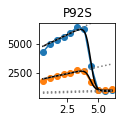

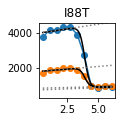

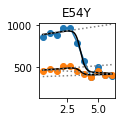

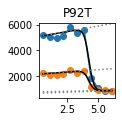

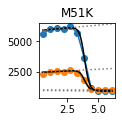

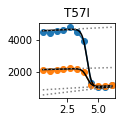

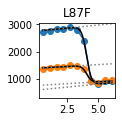

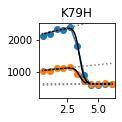

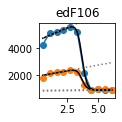

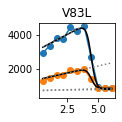

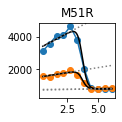

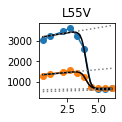

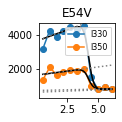

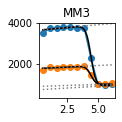

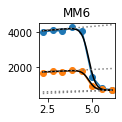

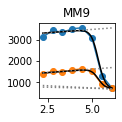

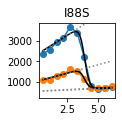

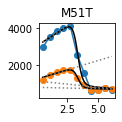

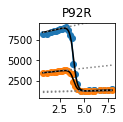

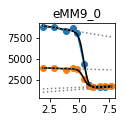

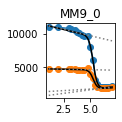

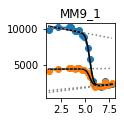

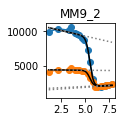

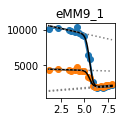

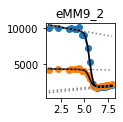

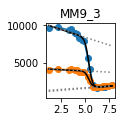

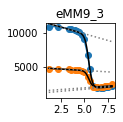

In [11]:
#Plot all fits in denaturant dimension

plt.rc('legend', fontsize=8)

for key in data_sets.keys():
    # Initial parameters
        data2plot = data_sets[key]
        fit2plot = fits[key]
        (temp_min, temp_max) = data2plot.get_temp_range()
        denat = [d['DENAT'] for d in data2plot]
        
        %matplotlib inline

        # Parameters of model
        param = fit2plot.params
        # param = param_init

        p = param.valuesdict()
        def folded_baseplane(p, D, T, label):
            if label[-6:] == 'REFOLD':
                label = label[:-7]
                return (p['a_F_'+label] + D*p['b_F_D_'+label] + T*p['b_F_T_'+label]) * p['k_refold']
            else:
                return (p['a_F_'+label] + D*p['b_F_D_'+label] + T*p['b_F_T_'+label])    
        def unfolded_baseplane(p, D, T, label):
            if label[-6:] == 'REFOLD':
                label = label[:-7]
                return ((p['a_U_'+label] + D*p['b_U_D_'+label] + T*p['b_U_T_'+label] + T*T*p['b_U_T2_'+label]) * p['k_refold'])
            else:
                return(p['a_U_'+label] + D*p['b_U_D_'+label] + T*p['b_U_T_'+label] + T*T*p['b_U_T2_'+label])

        # Model x-range (denaturant)
        x_denat = np.linspace(np.min(denat), np.max(denat), 1000)

        # Data y-range
        Imin = 400; Imax = 800
        for label in data2plot.get_curve_labels():
            Imin = np.nanmin(np.concatenate([np.array([Imin])]+[d[label] for d in data2plot]))
            Imax = np.nanmax(np.concatenate([np.array([Imax])]+[d[label] for d in data2plot]))

        # Plot model in denaturant dimension
        def f(T):
            fig, ax = plt.subplots(figsize=(1.8, 1.8))
            # Predict curve at T
            p_data = unfold2d_model.calc_sample(param, temp_target, np.array([T]), x_denat, data2plot.get_curve_labels())
            for label in data2plot.get_curve_labels():
                curve = [d[label][np.argmin(np.abs(d['T']-T))] for d in data2plot]
                ax.plot(denat, curve, 'o-', label=label)
            # Restart color cycler?
            for label in data2plot.get_curve_labels():
                plt.plot(x_denat, p_data[label], color='black')
            for label in data2plot.get_curve_labels():
                plt.plot(x_denat, folded_baseplane(p,x_denat,T-temp_target,label), ':', color='gray')
                plt.plot(x_denat, unfolded_baseplane(p,x_denat,T-temp_target,label), ':', color='gray')

            plt.ylim(Imin,Imax); 
            #plt.xlabel('Denaturant'); plt.ylabel('Intensity')
            if key == 'E54V':
                legend = ax.legend(loc='upper right' )
            
            plt.title(key)
            fig.tight_layout()
            plt.savefig('220210_FitPlots/' + key + '.svg')
            
            plt.show()
        
        f(25)
        #i = interact(f, T=IntSlider(min=50, max=temp_max, step=1, value=temp_target, continuous_update=False))

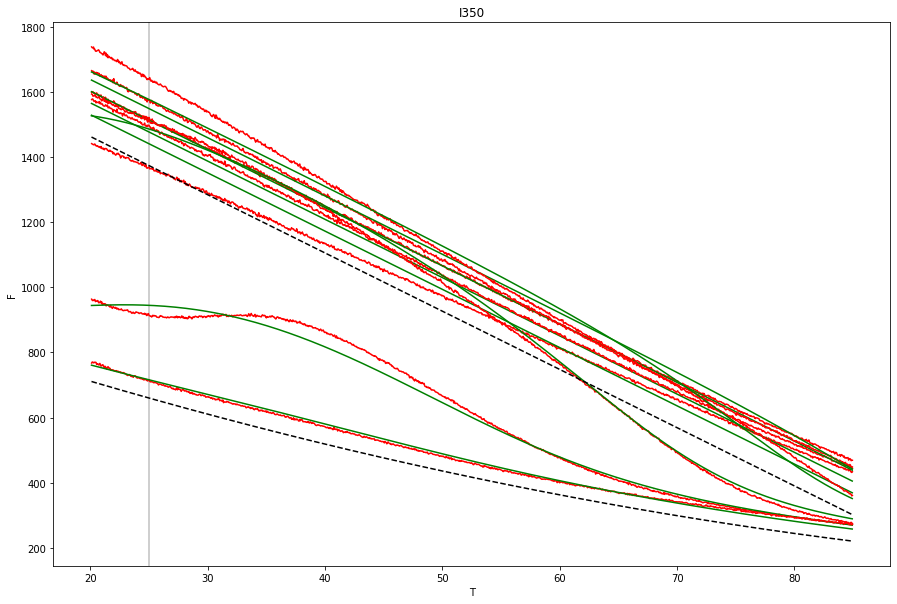

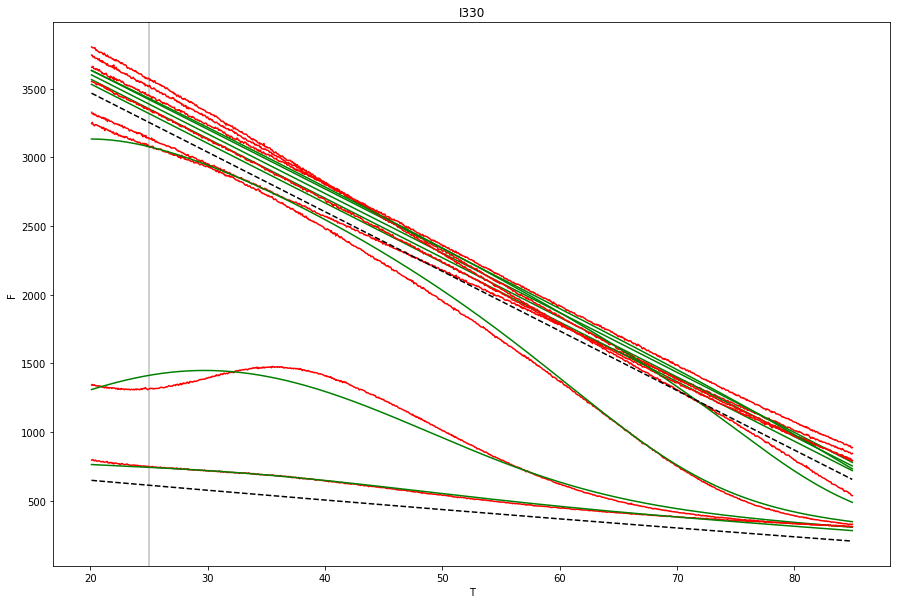

In [12]:
%matplotlib inline

sample = "MM9"
fit = fits[sample]
data2fit = data_sets[sample]

denat_min = np.min(denat); denat_max = np.max(denat)
x_temp = np.linspace(temp_min,temp_max,500)
dT = x_temp - temp_target

# # Plot initial parameters
# p_data = [unfold2d_model.calc_sample(param_init, temp_target, x_temp, d['DENAT'], ['I330','I350']) 
#           for d in data2fit ]
# p = param_init.valuesdict()

# Plot fitted parameters
p_data = [unfold2d_model.calc_sample(fit.params, temp_target, x_temp, d['DENAT'], data2fit.get_curve_labels()) 
          for d in data2fit ]
p = fit.params.valuesdict()

for label in data2fit.get_curve_labels():
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    ax.axvline(temp_target, color='silver')
    for di in range(len(data2fit)):
        plt.plot(data2fit[di]['T'], data2fit[di][label], linestyle='-', color='r')
        plt.plot(x_temp, p_data[di][label], linestyle='-', color='g')
    plt.plot(x_temp, p['a_F_'+label]+denat_min*p['b_F_D_'+label]+dT*p['b_F_T_'+label], '--', color='k')
    plt.plot(x_temp, p['a_U_'+label]+denat_max*p['b_U_D_'+label]+dT*p['b_U_T_'+label]+dT*dT*p['b_U_T2_'+label], 
             '--', color='k')
    plt.xlabel('T'); plt.ylabel('F'); plt.title(label); plt.show()

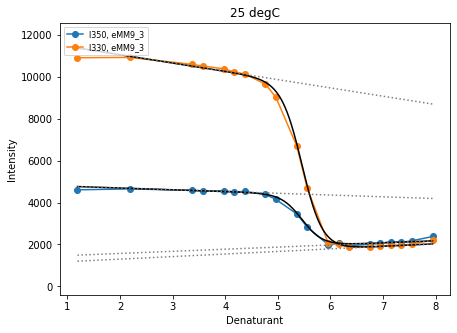

In [24]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(7, 5))
for sample in ["eMM9_3"]:
    fit = fits[sample]
    data2fit = data_sets[sample]

    # Parameters of model
    param = fit.params
    # param = param_init

    p = param.valuesdict()
    def folded_baseplane(p, D, T, label):
        return(p['a_F_'+label] + D*p['b_F_D_'+label] + T*p['b_F_T_'+label])    
    def unfolded_baseplane(p, D, T, label):
        return(p['a_U_'+label] + D*p['b_U_D_'+label] + T*p['b_U_T_'+label] + T*T*p['b_U_T2_'+label])

    # Model x-range (denaturant)
    denat = [d['DENAT'] for d in data2fit]
    x_denat = np.linspace(np.min(denat), np.max(denat), 1000)

    # Data y-range
    Imin = np.nan; Imax = np.nan
    for label in data2fit.get_curve_labels():
        Imin = np.nanmin(np.concatenate([np.array([Imin])]+[(d[label] if label in d.keys() else []) for d in data2fit]))
        Imax = np.nanmax(np.concatenate([np.array([Imax])]+[(d[label] if label in d.keys() else []) for d in data2fit]))
    I10pct = (Imax-Imin)/10.0

    # Plot model in denaturant dimension
    def f(T):
        #fig, ax = plt.subplots(figsize=(7, 5))
        # Predict curve at T
        p_data = unfold2d_model.calc_sample(param, temp_target, np.array([T]), x_denat, data2fit.get_curve_labels())
        for label in data2fit.get_curve_labels():
            curve = [(d[label][np.argmin(np.abs(d['T']-T))] if label in d.keys() else np.NaN) for d in data2fit]
            ax.plot(denat, curve, 'o-', label=label + ', ' + sample)
        for label in data2fit.get_curve_labels():
            plt.plot(x_denat, p_data[label], color='black')
        for label in data2fit.get_curve_labels():
            plt.plot(x_denat, folded_baseplane(p,x_denat,T-temp_target,label), ':', color='gray')
            plt.plot(x_denat, unfolded_baseplane(p,x_denat,T-temp_target,label), ':', color='gray')

        plt.ylim(Imin-I10pct,Imax+I10pct); plt.xlabel('Denaturant'); plt.ylabel('Intensity')
        legend = ax.legend(loc='upper left')
        #plt.show()
    plot_temp=25
    f(plot_temp)
plt.title(str(plot_temp) + ' degC')
plt.show()
#i = interact(f, T=IntSlider(min=temp_min, max=temp_max, step=1, value=temp_target, continuous_update=False))

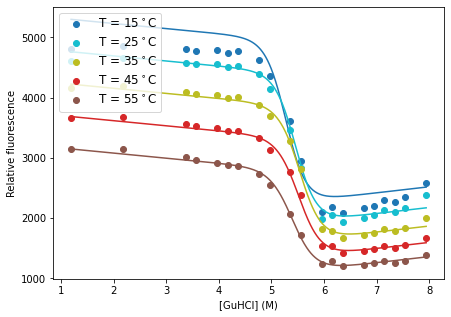

In [25]:
# Model x-range (denaturant)
x_denat = np.linspace(np.min(denat), np.max(denat), 1000)
label = 'I350'
col = {15: tab_col['tab:blue'], 25: tab_col['tab:cyan'], 35: tab_col['tab:olive'], 
       45: tab_col['tab:red'], 55: tab_col['tab:brown']}

fig, ax = plt.subplots(figsize=(7, 5))
for T in [15,25,35,45,55]:
    p_data = unfold2d_model.calc_sample(param, temp_target, np.array([T]), x_denat, data2fit.get_curve_labels())
    curve = [(d[label][np.argmin(np.abs(d['T']-T))] if label in d.keys() else np.NaN) for d in data2fit]
    ax.plot(denat, curve, 'o', color=col[T], label="T = %.0f$^\circ$C" % (T))
    plt.plot(x_denat, p_data[label], color=col[T])

plt.xlabel('[GuHCl] (M)'); plt.ylabel('Relative fluorescence')
legend = ax.legend(loc='upper left', prop={'size': 12})
plt.show()

In [26]:
# Find the observed midpoints for all samples (from which dG(T0,0) is extrapolated)
Tmid = []; Dmid = [];
curve_labels = data2fit.get_curve_labels()
for d in data2fit:
    dT = d['T'][1] - d['T'][0]
    dG = calc_dG(fit.params, temp=d['T'], denat=d['DENAT'])
    for label in curve_labels:
        if not label in d.keys():
            continue
        # Normalize observed intensity to the model without baselines
        model = unfold2d_model.eval(fit.params, temp_target=temp_target, temp=d['T'], denat=d['DENAT'], label=label)
        new_label = label+"_norm"
        d[new_label] = d[label]/model/(1+np.exp(dG))
        # Split temperature axis in windows of 5 deg length to identify all midpoints
        wini = 0
        for win in np.array_split(np.arange(len(d['T'])), (d['T'][-1]-d['T'][0])//5):
            wini += 1
            ti = np.argmin(np.abs(d[new_label][win]-0.5))
            ti = win[ti]
#             print("Curve %s-%02d win %2d:  %.2f (T[%d]=%.1f)" % 
#                   (label, d['SAMPLE'], wini, np.abs(d[new_label][ti]-0.5), ti, d['T'][ti]))
            if np.abs(d[new_label][ti]-0.5) < dT/2:
                Tmid.append(d['T'][ti])
                Dmid.append(d['DENAT'])
#                 print("Midpoint: T=%.1f D=%.1f" % (Tmid[-1], Dmid[-1]))

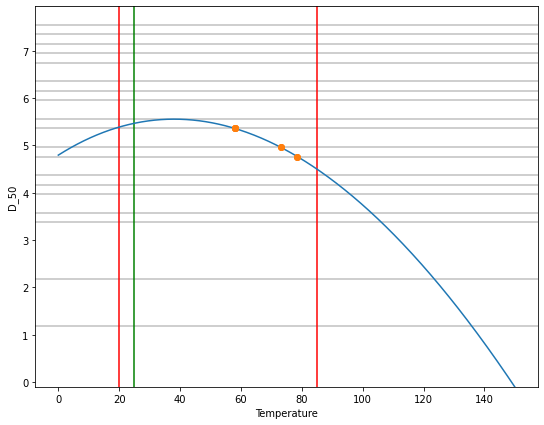

In [27]:
# When does the unfolding denaturant concentration, D_50, cross observed denaturant concentration?
# One advantage of 2D unfolding is that the denaturant unfolding condition is 'scanned' by constant 
# concentrations at many temperatures. This plot shows if this happens.
# At higher temperatures, D_50 is difficult to separate from baseline noise. Thus, use above plot 
# to determine the max temperature with reliable D_50.

p = fit.params.valuesdict()

x_temp = np.linspace(0, 150,500)
dT = x_temp - temp_target
D_50 = calc_dG(fit.params, x_temp)/(p['m0'] + p['m1']*dT + p['m2']*dT*dT)
fig, ax = plt.subplots(figsize=(9, 7))
[ax.axhline(d, color='silver') for d in denat]
ax.axvline(temp_min, color='r')
ax.axvline(temp_max, color='r')
ax.axvline(temp_target, color='g')
plt.plot(x_temp, D_50)
plt.plot(Tmid, Dmid, 'o')
plt.ylim(-0.1,np.max(denat))
plt.xlabel('Temperature'); plt.ylabel('D_50')
plt.show()


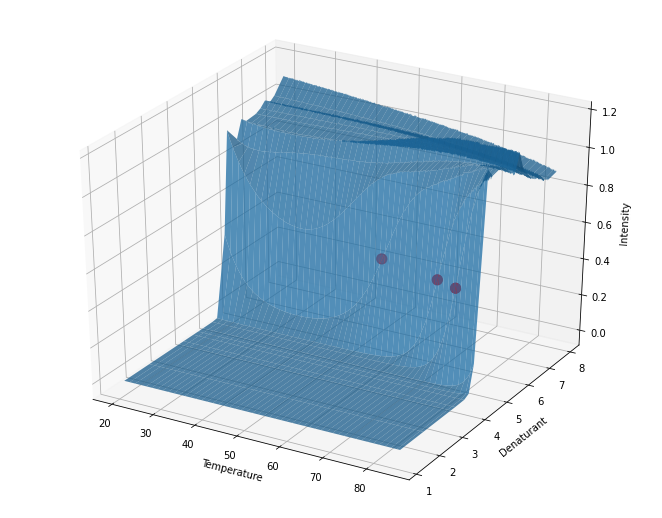

In [28]:
# 3D plot of model-normalized curve
from mpl_toolkits.mplot3d import Axes3D

# To enable rotating of the plot, use the notebook backend of matplotlib:
# %matplotlib notebook
# This may need a kernel restart and the above line run before matplotlib import. Sometimes, running the 
# line magic many times works... The interactive plots works best with the 'inline' backend

# A common temperature axis is needed for grid plotting
common_t = data2fit[0]['T']
t,d = np.meshgrid(common_t, denat)
obs = np.concatenate([d['I330_norm'] for d in data2fit])
# if this fails, perhaps T array.shape's are not identical in data2plot[:]
obs = obs.reshape(t.shape)

# 3D plot
fig = plt.figure(figsize=(9, 7))
ax = Axes3D(fig)
# Plot normalized data
surf = ax.plot_surface(t, d, obs, alpha=0.75)
# Plot observed midpoints
ax.scatter(Tmid, Dmid, 0.5, s=100, c="red") 
ax.set_xlabel('Temperature'); ax.set_ylabel('Denaturant'); ax.set_zlabel('Intensity')
plt.show()

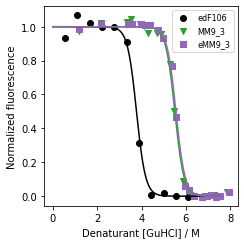

In [32]:
%matplotlib inline
import itertools

#Temperature for the plot
x_temp = 37
dT = x_temp - temp_target
T_abs = x_temp-K0

markers = itertools.cycle(('o','v','s'))
colors = itertools.cycle(('k','tab:green','tab:purple'))

samples_to_plot = ['edF106'
                   ,'MM9_3'
                   ,'eMM9_3']

fig, ax = plt.subplots(figsize=(3.5,3.5))

for sample in samples_to_plot:
    data2plot = data_sets[sample]
    fit2plot = fits[sample]
    (temp_min, temp_max) = data2plot.get_temp_range()
    denat = [d['DENAT'] for d in data2plot]
    denat_min = np.min(denat); denat_max = np.max(denat)

    heat_col = next(colors)

    # Parameters of model
    param = fit2plot.params 
    #Get delta G
    dG = calc_dG(param, temp=x_temp)
    p = param.valuesdict()

    norm_curve = {}
    #Plot normalized datapoints 
    for label in data2plot.get_curve_labels():
        curve = [d[label][np.argmin(np.abs(d['T']-x_temp))] for d in data2plot]
        norm_curve[label] = []

        for i in range(len(denat)):
            dG_app = -dG + p['m0']*denat[i] + p['m1']*denat[i]*dT
            norm_curve[label].append((curve[i] - (unfolded_baseplane(p, denat[i], dT, label) / 
                                                  (1 + np.exp(-(dG_app))
                                                   /(R*T_abs)))
                                     )/ folded_baseplane(p, denat[i], dT, label))

    #The average value between the measurement at 330nm and at 350nm i calculated below and plottet
    avg_norm_curve = 0
    for label in data2plot.get_curve_labels():
        avg_norm_curve += np.array(norm_curve[label])
    avg_norm_curve = avg_norm_curve/len(data2plot.get_curve_labels())

    ax.scatter(denat, avg_norm_curve, label= sample, color = heat_col, marker=next(markers))

    #Plot normalized fit
    x_fit =  np.arange(0,7.5,0.01)
    norm_fit_curve = []
    for i in x_fit:
        dG_app = -dG + p['m0']*i + p['m1']*i*dT
        norm_fit_curve.append(np.exp(-(dG_app/(R*T_abs)))/(1 + np.exp(-(dG_app)/(R*T_abs))))
    ax.plot(x_fit,norm_fit_curve,color = heat_col, marker = '')

#plt.title(f'Fit at {x_temp} deg')
plt.xlabel('Denaturant [GuHCl] / M')
plt.ylabel('Normalized fluorescence')
plt.legend()


plt.tight_layout()
plt.savefig('220121_edF106_MM9_eMM9.svg')

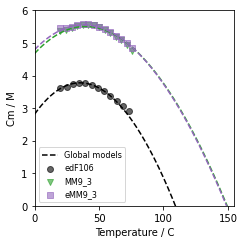

In [35]:
# Version using the Cm/dG fitting instead of m/dG


from lmfit import Model
import itertools

markers = itertools.cycle(('o','v','s','<','>','^','p','h'))
colors = itertools.cycle(('k','tab:green','tab:purple','tab:blue','tab:orange','tab:red','red'))

samples_to_plot = ['edF106'
                   ,'MM9_3'
                   ,'eMM9_3'
                  ]
d = {}

for sample in samples_to_plot:
    data2plot = data_sets[sample]
    fit2plot = fits[sample]
    denat = [d['DENAT'] for d in data2plot]

       
    d[sample] = {}
    d[sample]['T_list'] = []
    d[sample]['dG_list'] = []
    d[sample]['dG_stderr_list'] = []
    d[sample]['Cm_list'] = []
    d[sample]['Cm_stderr_list'] = []

    for T in data2plot[0]['T'][:-155:90]: #Only calculate for every 90th temperature without highest   
        
        # Model to simultaneously fit 330 and 350 nm to denaturant unfolding parameterized with dG and Cm
        T_abs = T-K0
        
        def denat_unfold(denat,label, af_330=1.0, bf_330=1.00, au_330=1.0, bu_330=1.0, dG=1.0, Cm=5.0,
                                    af_350=1.0, bf_350=1.0, au_350=1.0, bu_350=1.0):
        
            I330 = ((bu_330 + au_330*denat + (bf_330 + af_330*denat)*np.exp(-(-dG*(1-denat/Cm))/(R*T_abs)))
                            /(1 + np.exp(-(-dG*(1-denat/Cm))/(R*T_abs))))

            I350 = ((bu_350 + au_350*denat + (bf_350 + af_350*denat)*np.exp(-(-dG*(1-denat/Cm))/(R*T_abs)))
                            /(1 + np.exp(-(-dG*(1-denat/Cm))/(R*T_abs))))

            return np.where(label==0.,I330,0.) + np.where(np.array(label)==1.,I350,0.)

        def denat_unfold_recalc(denat, af, bf, au, bu, dG, Cm):
            return ((bu + au*denat + (bf + af*denat)*np.exp(-(-dG*(1-denat/Cm))/(R*T_abs)))
                            /(1 + np.exp(-(-dG*(1-denat/Cm))/(R*T_abs))))
    
        denatData = np.array(denat + denat)
        flour330 = [d['I330'][np.argmin(np.abs(d['T']-T))] for d in data2plot]
        flour350 = [d['I350'][np.argmin(np.abs(d['T']-T))] for d in data2plot]
        
        data = flour330 + flour350
        label = [0. for i in range(len(flour330))] + [1. for i in range(len(flour350))]
 
        # Initiate fit model
        testFitModel = Model(denat_unfold, independent_vars=['denat', 'label'])

        # Make guesses for the fit parameters 
        dG_guess = 70
        Cm_guess  = 5
        au_330_guess = (flour330[-1]-flour330[-2])/(denat[-1])
        bu_330_guess = flour330[-1]
        af_330_guess = ((flour330[1]-flour330[0])/(denat[1]-denat[0]) + 
                   (flour330[2]-flour330[0])/(denat[2]-denat[0]))/2
        bf_330_guess = flour330[0]  - af_330_guess*denat[0]
        
        au_350_guess = (flour350[-1]-flour350[-2])/(denat[-1])
        bu_350_guess = flour350[-1]
        af_350_guess = ((flour350[1]-flour350[0])/(denat[1]-denat[0]) + 
                   (flour350[2]-flour350[0])/(denat[2]-denat[0]))/2
        bf_350_guess = flour350[0]  - af_350_guess*denat[0]

        # Parse the guesses
        params = testFitModel.make_params()
        params.add('dG',value=dG_guess)
        params.add('af_330',value=af_330_guess)
        params.add('bf_330',value=bf_330_guess)
        params.add('au_330',value=au_330_guess)
        params.add('bu_330',value=bu_330_guess)
        
        params.add('af_350',value=af_350_guess)
        params.add('bf_350',value=bf_350_guess)
        params.add('au_350',value=au_350_guess)
        params.add('bu_350',value=bu_350_guess)
        params.add('Cm',value=Cm_guess, vary = True)

        # Fit and print results
        fitResult = testFitModel.fit(data, params, denat=denatData, label = label)
        try:
            fitResult = testFitModel.fit(data, params, denat=denatData, label = label)
            #print(fitResult.fit_report(show_correl=False))
            
            d[sample]['dG_list'].append((fitResult.params["dG"]).value)
            d[sample]['dG_stderr_list'].append((fitResult.params["dG"]).stderr)
            d[sample]['Cm_list'].append((fitResult.params["Cm"]).value)
            d[sample]['Cm_stderr_list'].append((fitResult.params["Cm"]).stderr)
            d[sample]['T_list'].append(T)

        except:
            pass
            print('Fitting at ' + str(T) + ' deg failed!')

first = True
f,ax = plt.subplots(figsize=(3.5,3.5), sharex=True)    
for sample in samples_to_plot:
    fit2plot = fits[sample]
    d_temp = d[sample]
    
    if sample == 'WT':
        sample = 'edF106'
        
    marker = next(markers)
    color = next(colors)

    # Plot fitted curve
    contT = np.arange(0,150,0.01)
    twoD_fit = [calc_dG(fit2plot.params,t) for t in contT]

    # Plot Cm-value
    ax.scatter(d_temp['T_list'],d_temp['Cm_list'], color = color, marker=marker, alpha = 0.6, label= sample)
    
    # Plot global fit Cm-values
    if first:
        ax.plot(contT,np.array(twoD_fit)/(fit2plot.params['m0']), color = color, linestyle = '--', label = 'Global models')
        first = False
    else:
        ax.plot(contT,np.array(twoD_fit)/(fit2plot.params['m0']), color = color, linestyle = '--')
        
    ax.set_xlim([0,155])
    ax.set_ylim([0,6])
    #axs[1].set_xlabel('Temperature / C')
    ax.set_ylabel("Cm / M")
    ax.set_xlabel('Temperature / C')
    ax.legend()

plt.tight_layout()
plt.savefig('220121_eMM9_MM9_edF106_SingleFits.svg')


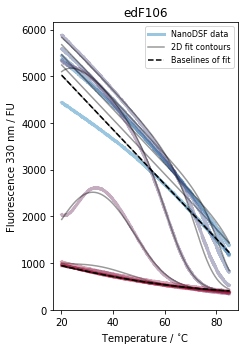

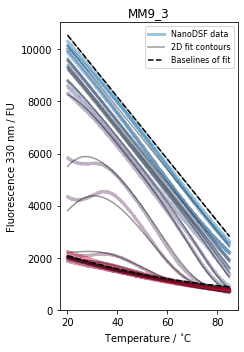

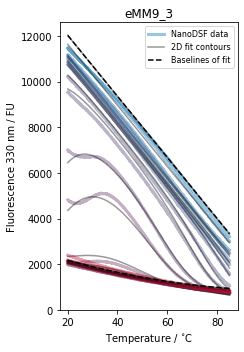

In [14]:
# Figures of raw data 
%matplotlib inline

for sample in ['edF106','MM9_3','eMM9_3']:
    colors = [np.array([202,0,32]),np.array([5,113,176])]

    data2plot = data_sets[sample]
    fit2plot = fits[sample]

    (temp_min, temp_max) = data2plot.get_temp_range()
    x_temp = np.linspace(temp_min,temp_max,500)
    dT = x_temp - temp_target
    denat = [d['DENAT'] for d in data2plot]
    denat_min = np.min(denat); denat_max = np.max(denat)

    # Plot fitted parameters
    p_data = [unfold2d_model.calc_sample(fit2plot.params, temp_target, x_temp, d['DENAT'], ['I330','I330_REFOLD']) 
              for d in data2plot ]
    p = fit2plot.params.valuesdict()


    fig, ax1 = plt.subplots(1,1,figsize=(3.5, 5),sharex=True)
    first = True
    for di in range(len(data2plot)):
        color = di/len(data2plot)*colors[0] + (1-di/len(data2plot))*colors[1]
        color = tuple(color/255)
        if first:
            ax1.plot(data2plot[di]['T'], data2plot[di]['I330'], linestyle='-', color=color, label = "NanoDSF data", linewidth = 3, alpha=.4)
            ax1.plot(x_temp, p_data[di]['I330'], linestyle='-', color='k', label = "2D fit contours", alpha=.4)
            first = False
        else:
            ax1.plot(data2plot[di]['T'], data2plot[di]['I330'], linestyle='-', color=color, linewidth = 3, alpha=.4)
            ax1.plot(x_temp, p_data[di]['I330'], linestyle='-', color='k', alpha=.4)      
    ax1.plot(x_temp, p['a_F_I330']+denat_min*p['b_F_D_I330']+dT*p['b_F_T_I330'], '--', color='k',
            label = 'Baselines of fit')
    ax1.plot(x_temp, p['a_U_I330']+denat_max*p['b_U_D_I330']+dT*p['b_U_T_I330']+dT*dT*p['b_U_T2_I330'], '--', color='k')
    ax1.set_xlabel('Temperature / ' + r'$^{\circ}$C'); ax1.set_ylabel('Fluorescence 330 nm / FU')
    ax1.legend()
    ax1.set_ylim(bottom = 0)
    #ax1.text(60,2000,sample)
    ax1.set_title(sample)
    plt.tight_layout()
    plt.savefig(sample + '_TempDemDataFit330nm.svg')
    plt.show()